## Exercise2

In this exercise, we'll look at the distribution of cities across the planet. The same approach would work for disease outbreaks. Begin by downloading the basic (free) data set from https://simplemaps.com/data/world-cities (Links to an external site.) (click the white download button); this data is licensed CC BY 4.0. We will ignore everything except the locations of the cities, which are identified by 'lng' (longitude) and 'lat' (latitude).

Note: distance between two points on Earth is not proportional to the square root of the sum of the squares of the differences in coordinates because (1) latitude and longitude have different ranges, and (2) the Earth is round. Instead of using Euclidean distance, use the Haversine formula; a Python implementation can be found in the accepted answer to:

https://stackoverflow.com/questions/4913349/haversine-formula-in-python-bearing-and-distance-between-two-gps-points

(Feel free to reuse this Python Haversine function verbatim.)

(If you need exact distances across a planetary scale, you would want to use a metric that takes into account the ellipsoid nature of the planet, but treating it as a sphere suffices for our purposes.)

As briefly introduced in slides13, k-means is an algorithm for automatically identifying clusters in data. Lloyd's algorithm (there are others) for k-means is simple: for a given k, pick k points at pseudo-random from your data set (this is called the Forgy method for initialization, there are other other strategies). These will be "seeds" for forming k clusters. Assign each data point to a cluster based on whichever seed point is closest. Iterate, using the centroid of each cluster as the seeds for the next round of point assignments. Repeat until convergence. (Feel free to Google or ask questions if you need clarification on the algorithm.)

Modify the k-means code (or write your own) from slides8 to use the Haversine metric and work with our dataset (5 points). Note: since this algorithm uses (pseudo)randomness, you'll have to run it multiple times to get a sense of expected runtime. Visualize your results with a color-coded scatter plot (5 points); be sure to use an appropriate map projection (i.e. do not simply make x=longitude and y=latitude; 5 points). Use this algorithm to cluster the cities data for k=5, 7, and 15. Run it several times to get a sense of the variation of clusters for each k (share your plots) (5 points); comment briefly on the diversity of results for each k. (5 points)

As a comparison, here is a result I got running with k = 5:

Feel free to do the map projections in any way that is correct, but one option is to use cartopy (instructions here.). Here's an example of plotting the locations of three universities:

Extra credit (5 points): speedup your code using the multiprocessing module and demonstrate the speedup and discuss how it scales.

## Response 

In [60]:
# importing libraries 
import pandas as pd 
import random
import numpy as np
from time import perf_counter
import matplotlib.pyplot as plt
import random
import warnings
warnings.filterwarnings("ignore")

In [45]:
import cartopy.crs as ccrs

In [46]:
##Loading the dataset 
data = pd.read_csv("/Users/mahimakaur/Desktop/worldcities.csv")

In [47]:
# reference: https://stackoverflow.com/questions/4913349/haversine-formula-in-python-bearing-and-distance-between-two-gps-points
# Haversine formula
from math import radians, cos, sin, asin, sqrt

def haversine(lng1, lat1, lng2, lat2):
    """
    Calculate the great circle distance in kilometers between two points 
    on the earth (specified in decimal degrees)
    """
    # convert decimal degrees to radians 
    lng1, lat1, lng2, lat2 = map(radians, [lng1, lat1, lng2, lat2])

    # haversine formula 
    dlng = lng2 - lng1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlng/2)**2
    c = 2 * asin(sqrt(a)) 
    r = 6371 # Radius of earth in kilometers. Use 3956 for miles. Determines return value units.
    return c * r

In [48]:
def assign_cluster_ids(pts,centers):
    pts = list(pts)
    cluster_ids = []
    for pt in pts:
            min_cluster = -1
            min_dist = float('inf')
            for i, center in enumerate(centers):
                dist = haversine(pt[0],pt[1],center[0],center[1])
                if dist < min_dist:
                    min_cluster = i
                    min_dist = dist
            cluster_ids.append(min_cluster)
    return cluster_ids

#### Creating a funtion to find kmeans

In [49]:
def kmeans(df,k = 5):
    data = df.copy()
    pts = [np.array(pt) for pt in zip(data['lng'],data['lat'])]
    centers = random.sample(pts, k)
    old_cluster_ids, cluster_ids = None, [] 
    while cluster_ids != old_cluster_ids:
        old_cluster_ids = list(cluster_ids)
        cluster_ids = []
        for pt in pts:
            min_cluster = -1
            min_dist = float('inf')
            for i, center in enumerate(centers):
                dist = haversine(pt[0],pt[1],center[0],center[1])
                if dist < min_dist:
                    min_cluster = i
                    min_dist = dist
            cluster_ids.append(min_cluster)
        data['cluster'] = cluster_ids
        cluster_pts = [[pt for pt, cluster in zip(pts, cluster_ids) if cluster == match]
        for match in range(k)]
        centers = [sum(pts)/len(pts) for pts in cluster_pts]
    return data

#### A funtion to create the map plot

In [50]:
def plot_figure(data):
    fig = plt.figure(figsize=(11, 11), dpi=90)
    ax = fig.add_subplot(1, 1, 1, projection=ccrs.Robinson())
    ax.coastlines()
    ax.scatter(data['lng'], data['lat'], s = 2,c = list(data['cluster']), transform=ccrs.PlateCarree())
    ax.set_extent([-180, 180, -90, 90], crs=ccrs.PlateCarree())

#### A function to check the runtime for k means clustering

In [51]:
def runtime(k):
    time = []
    time_start = perf_counter()
    df = kmeans(data,k)
    time_end = perf_counter()
    time.append(time_end - time_start)
    print (f"The runtime when k = {k} is {time[0]} second.")

#### Map Plot and Runtime for k = 5, 7 and 15

In [53]:
kmeansdata_5 = kmeans(data,5)

In [55]:
kmeansdata_7 = kmeans(data,7)

In [56]:
kmeansdata_15 = kmeans(data,15)

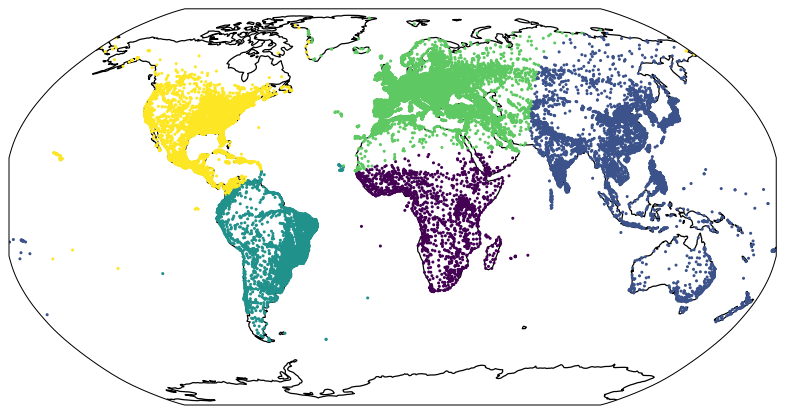

In [62]:
plot_figure(kmeansdata_5)

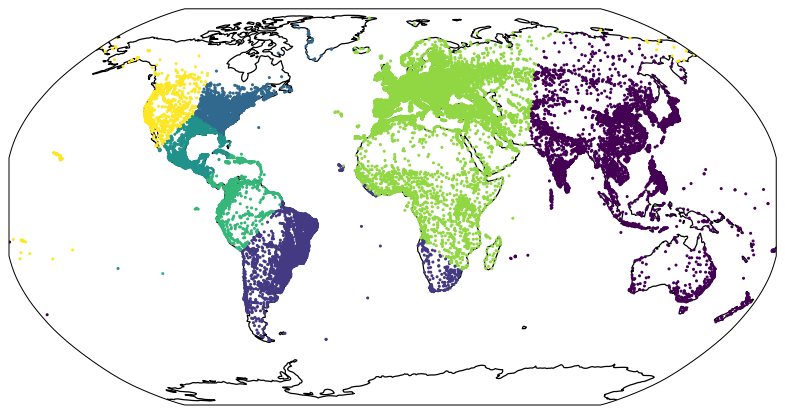

In [63]:
plot_figure(kmeansdata_7)

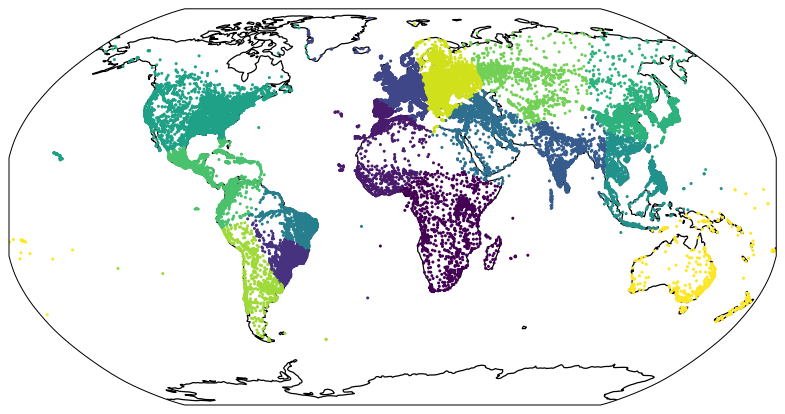

In [64]:
plot_figure(kmeansdata_15)

In [86]:
runtime(5)

The runtime when k = 5 is 7.6024640000000545 second.


In [66]:
runtime(7)

The runtime when k = 7 is 8.207865458000015 second.


In [67]:
runtime(15)

The runtime when k = 15 is 25.544607874999997 second.


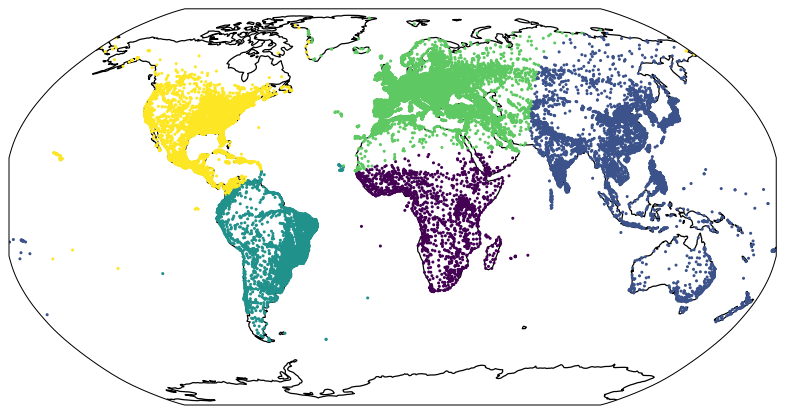

In [68]:
plot_figure(kmeansdata_5)

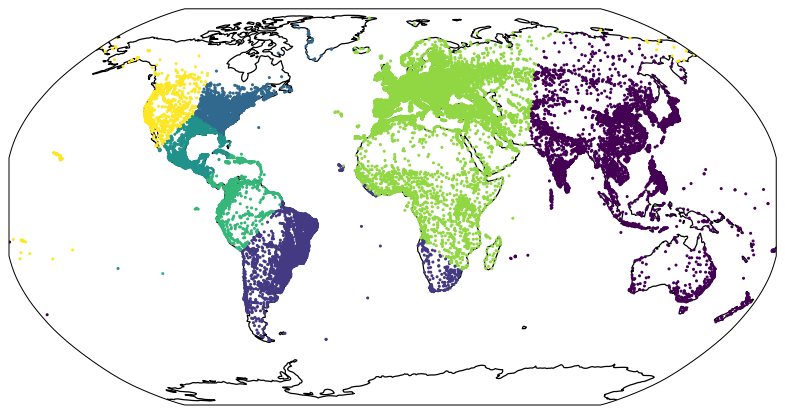

In [69]:
plot_figure(kmeansdata_7)

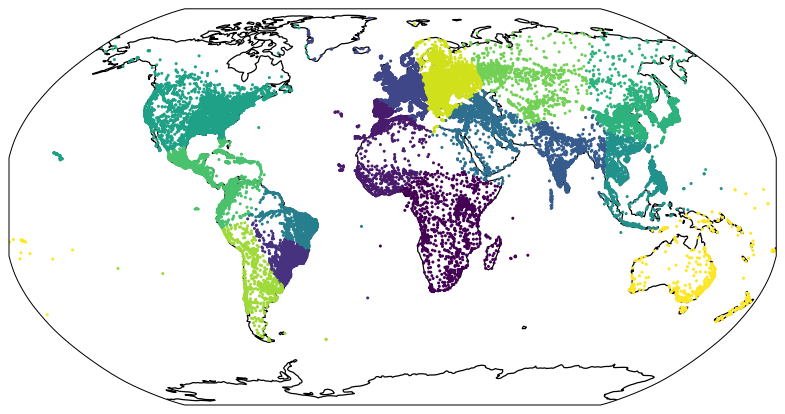

In [70]:
plot_figure(kmeansdata_15)

In [72]:
runtime(5)

The runtime when k = 5 is 4.809692083000073 second.


In [73]:
runtime(7)

The runtime when k = 7 is 8.561810665999928 second.


In [74]:
runtime(15)

The runtime when k = 15 is 19.55858304200001 second.


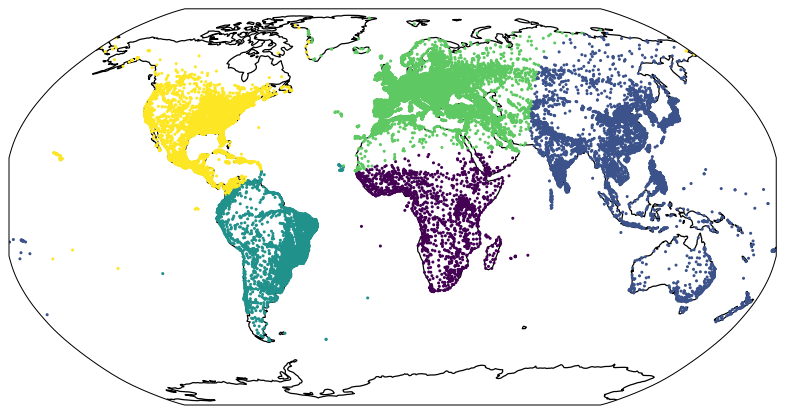

In [76]:
plot_figure(kmeansdata_5)

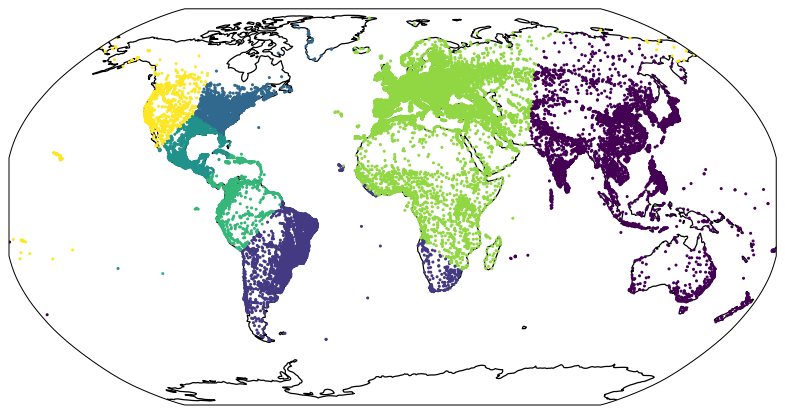

In [77]:
plot_figure(kmeansdata_7)

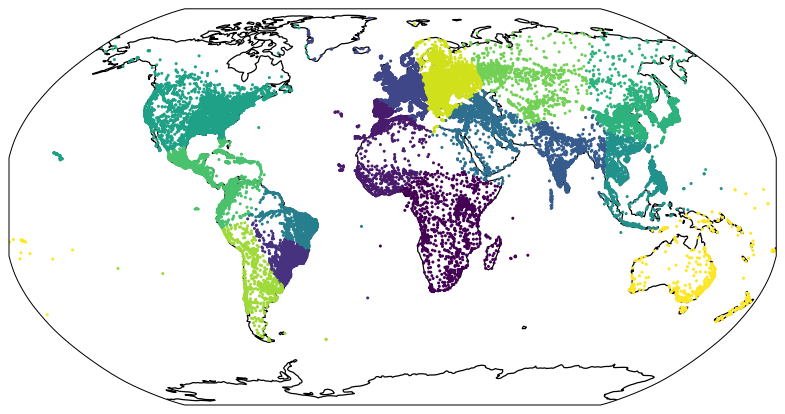

In [78]:
plot_figure(kmeansdata_15)

In [84]:
runtime(5)

The runtime when k = 5 is 3.554565792000176 second.


In [83]:
runtime(7)

The runtime when k = 7 is 5.1829874580000705 second.


In [85]:
runtime(15)

The runtime when k = 15 is 45.04033758399987 second.


#### Q. Comment briefly on the diversity of results for each k.

Runtime : Runtime tends to change in a wide range. For k = 5 , it took between 3.5 to 7 seconds to run. For k = 7, it took between 5 to 8 seconds. For k = 15, it took between 19 to 45 seconds. With k = 15 having the higher runtime. 

Clusters are varied and different for k = 5,7 and 15.
When k = 5 : The two adjacent continents (e.g. Asia and Australia, North America and South America, Europe and Africa)
always combine together. Somehwhate same pattern was seen when k = 7.  The smaller the k the clusters formed are larger, one of the cluster covered almost two continents. There is no obvious pattern seen when k = 15 when compared with plots from k = 5 and k = 7 and the clusters are diverse when k = 15. There is most variation in the clusters when k = 15. I guess more clusters are formed when k is larger. Example : South America was one cluster when k = 5 , two clusters when k = 7 and four clusters when k = 15. 